# Planar 2R Robot Example

This example demonstrates how to define a simple 2R planar robot using Denavit-Hartenberg parameters
and compute its symbolic forward kinematics using the `symbolic_robotics` package.


In [5]:
import sys
sys.path.append("../src")  
from sympy import symbols, Function, pi
from base_robot import RobotModel
from dh_parameters import DHParams
from kinematics import compute_forward_kinematics, get_end_effector_pose

t = symbols('t')


In [6]:
# Define time-dependent joint variables
theta1 = Function('theta1')(t)
theta2 = Function('theta2')(t)

# Link lengths
a1 = 1
a2 = 1

# Create DH parameter objects
dh1 = DHParams(a=a1, alpha=0, d=0, theta=theta1)
dh2 = DHParams(a=a2, alpha=0, d=0, theta=theta2)

dh_params = [dh1, dh2]


In [7]:
# Initialize RobotModel
robot = RobotModel(
    n_joints=2,
    time_var=t,
    dh_params=dh_params
)

robot.describe()


Robot with 2 joints.
  Joint 1: a=1, alpha=0, d=0, theta=theta1(t)
  Joint 2: a=1, alpha=0, d=0, theta=theta2(t)


In [9]:
# Compute transformation matrices
T_all = compute_forward_kinematics(robot)

# Show final pose (end-effector transformation)
T_end = get_end_effector_pose(robot)
T_end


Matrix([
[-sin(theta1(t))*sin(theta2(t)) + cos(theta1(t))*cos(theta2(t)), -sin(theta1(t))*cos(theta2(t)) - sin(theta2(t))*cos(theta1(t)), 0, -sin(theta1(t))*sin(theta2(t)) + cos(theta1(t))*cos(theta2(t)) + cos(theta1(t))],
[ sin(theta1(t))*cos(theta2(t)) + sin(theta2(t))*cos(theta1(t)), -sin(theta1(t))*sin(theta2(t)) + cos(theta1(t))*cos(theta2(t)), 0,  sin(theta1(t))*cos(theta2(t)) + sin(theta1(t)) + sin(theta2(t))*cos(theta1(t))],
[                                                             0,                                                              0, 1,                                                                               0],
[                                                             0,                                                              0, 0,                                                                               1]])

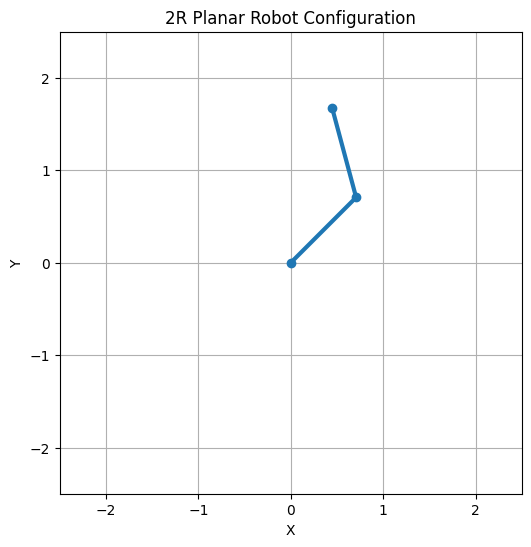

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define numerical joint values (in radians)
theta1_val = np.pi / 4  # 45 degrees
theta2_val = np.pi / 3  # 60 degrees

# Step 2: Substitute values into the symbolic expressions
T1 = T_all[0].subs({theta1: theta1_val})
T2 = T_all[1].subs({theta1: theta1_val, theta2: theta2_val})

# Step 3: Extract joint positions
O0 = np.array([0, 0])
O1 = np.array([T1[0, 3], T1[1, 3]]).astype(np.float64)
O2 = np.array([T2[0, 3], T2[1, 3]]).astype(np.float64)

# Step 4: Plot the robot
x_vals = [O0[0], O1[0], O2[0]]
y_vals = [O0[1], O1[1], O2[1]]

plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, marker='o', linewidth=3)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.title("2R Planar Robot Configuration")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()
